In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [21]:
nifty_data=pd.read_excel("D:/Data/Downloads/Nifty_10.xlsx")
bnf_data=pd.read_excel("D:/Data/Downloads/BNF.xlsx")

In [25]:
nifty_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-14,25208.00,25242.95,25383.00,25188.00,150.93K,0.0007
1,2024-10-11,25189.30,25298.65,25298.65,25152.00,244.85K,-0.0030
2,2024-10-10,25266.30,25362.00,25406.00,25250.00,394.18K,0.0014
3,2024-10-09,25230.40,25308.00,25490.00,25190.55,546.78K,-0.0017
4,2024-10-08,25273.95,25140.20,25335.00,25080.00,540.55K,0.0059


In [27]:
bnf_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-14,51930.20,51469.95,51982.05,51454.35,861.14K,0.0106
1,2024-10-11,51386.40,51897.00,51897.00,51219.10,1.62M,-0.0076
2,2024-10-10,51780.95,51510.00,51930.00,51431.00,1.43M,0.0079
3,2024-10-09,51373.70,51460.00,52037.00,51311.30,3.15M,-0.0004
4,2024-10-08,51392.50,51132.05,51559.00,50878.05,1.95M,0.0074


In [37]:
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
bnf_data['Date'] = pd.to_datetime(bnf_data['Date'])

# Step 3: Merge the DataFrames on the 'Date' column
merged_data = pd.merge(nifty_data, bnf, on='Date', suffixes=('_Nifty', '_BankNifty'))

# Step 4: Check the merged DataFrame
print(merged_data.head())

        Date  Price_Nifty  Open_Nifty  High_Nifty  Low_Nifty Vol._Nifty  \
0 2024-10-14     25208.00    25242.95    25383.00   25188.00    150.93K   
1 2024-10-11     25189.30    25298.65    25298.65   25152.00    244.85K   
2 2024-10-10     25266.30    25362.00    25406.00   25250.00    394.18K   
3 2024-10-09     25230.40    25308.00    25490.00   25190.55    546.78K   
4 2024-10-08     25273.95    25140.20    25335.00   25080.00    540.55K   

   Change %_Nifty  Price_BankNifty  Open_BankNifty  High_BankNifty  \
0          0.0007         51930.20        51469.95        51982.05   
1         -0.0030         51386.40        51897.00        51897.00   
2          0.0014         51780.95        51510.00        51930.00   
3         -0.0017         51373.70        51460.00        52037.00   
4          0.0059         51392.50        51132.05        51559.00   

   Low_BankNifty Vol._BankNifty  Change %_BankNifty  
0       51454.35        861.14K              0.0106  
1       51219.10    

In [65]:
merged_data['Calculation'] = (merged_data['High_Nifty'] * 2) - merged_data['High_BankNifty']

# Step 6: Display the relevant columns
print(merged_data[['Date', 'High_Nifty', 'High_BankNifty', 'Calculation']])

average_Calculation = merged_data['Calculation'].mean()
# Display the results
print(merged_data[['Date', 'Price_Nifty', 'Price_BankNifty', 'Parity_Ratio']])
print(f"Average Parity Ratio: {average_Calculation}")

           Date  High_Nifty  High_BankNifty  Calculation
0    2024-10-14    25383.00        51982.05     -1216.05
1    2024-10-11    25298.65        51897.00     -1299.70
2    2024-10-10    25406.00        51930.00     -1118.00
3    2024-10-09    25490.00        52037.00     -1057.00
4    2024-10-08    25335.00        51559.00      -889.00
...         ...         ...             ...          ...
2471 2014-10-17     7872.65        16032.00      -286.70
2472 2014-10-16     7919.20        15880.00       -41.60
2473 2014-10-14     7952.00        15899.00         5.00
2474 2014-10-13     7929.90        15749.00       110.80
2475 2014-10-10     7948.00        15735.00       161.00

[2476 rows x 4 columns]
           Date  Price_Nifty  Price_BankNifty  Parity_Ratio
0    2024-10-14     25208.00         51930.20      0.485421
1    2024-10-11     25189.30         51386.40      0.490194
2    2024-10-10     25266.30         51780.95      0.487946
3    2024-10-09     25230.40         51373.70      

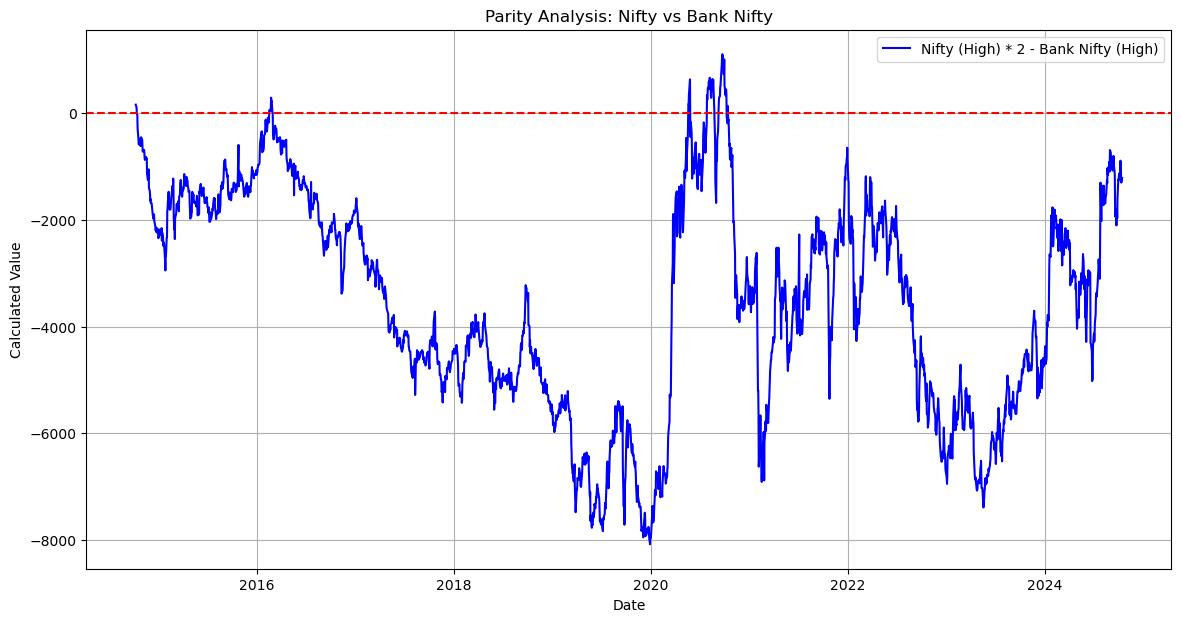

In [41]:
import matplotlib.pyplot as plt

# Plot the calculated values over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Calculation'], label='Nifty (High) * 2 - Bank Nifty (High)', color='blue')
plt.axhline(0, color='red', linestyle='--')  # Add a line at 0 for reference
plt.title('Parity Analysis: Nifty vs Bank Nifty')
plt.xlabel('Date')
plt.ylabel('Calculated Value')
plt.legend()
plt.grid()
plt.show()


In [43]:
correlation = merged_data['High_Nifty'].corr(merged_data['High_BankNifty'])
print("Correlation between Nifty and Bank Nifty: ", correlation)


Correlation between Nifty and Bank Nifty:  0.9810354855857227


A correlation of 0.981 indicates that the two indices move in tandem. This means that when Nifty rises, Bank Nifty tends to rise as well, and vice versa.

Cointegration Test: Perform a cointegration test (like the Augmented Dickey-Fuller test) to check if the two series are cointegrated, which means they have a stable, long-term relationship.

In [46]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(merged_data['High_Nifty'], merged_data['High_BankNifty'])
print("Cointegration test p-value: ", p_value)


Cointegration test p-value:  0.14725264586569564


p-value = 0.147: Since this p-value is greater than the common significance level of 0.05, you fail to reject the null hypothesis. This suggests that Nifty and Bank Nifty do not have a stable long-term relationship.

In [67]:
# Parity Ratio
#Calculate the Parity Ratio
merged_data['Parity_Ratio'] = merged_data['High_Nifty'] / merged_data['High_BankNifty']

# Calculate the average of the Parity Ratio
average_parity_ratio = merged_data['Parity_Ratio'].mean()

# Display the results
print(merged_data[['Date', 'Price_Nifty', 'Price_BankNifty', 'Parity_Ratio']])
print(f"Average Parity Ratio: {average_parity_ratio}")

           Date  Price_Nifty  Price_BankNifty  Parity_Ratio
0    2024-10-14     25208.00         51930.20      0.488303
1    2024-10-11     25189.30         51386.40      0.487478
2    2024-10-10     25266.30         51780.95      0.489236
3    2024-10-09     25230.40         51373.70      0.489844
4    2024-10-08     25273.95         51392.50      0.491379
...         ...          ...              ...           ...
2471 2014-10-17      7817.05         15990.95      0.491059
2472 2014-10-16      7778.10         15574.00      0.498690
2473 2014-10-14      7895.25         15799.15      0.500157
2474 2014-10-13      7911.40         15711.20      0.503518
2475 2014-10-10      7886.80         15496.25      0.505116

[2476 rows x 4 columns]
Average Parity Ratio: 0.4407231192688521


The average parity ratio indicates that, on average, the price of Nifty futures is about 44.2% of the price of Bank Nifty futures. This reflects how these two indices compare in terms of their futures prices over the period you've analyzed.

A low parity ratio (less than 1) typically suggests that Nifty futures are significantly less expensive than Bank Nifty futures. This could be due to various factors, including market sentiment, economic conditions, or sector-specific events impacting the bank sector more than the overall market.

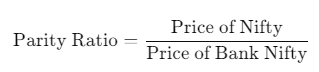

The calculated parity ratios range around 0.48 to 0.51.
A parity ratio significantly lower than 1 (in this case, around 0.49) suggests that Nifty futures are priced at about 48% to 51% of the Bank Nifty futures price.

A consistent ratio indicates a stable relationship between the two indices. If the ratio is relatively stable over time, it means that they are likely moving together, reflecting similar market sentiments or conditions.

If the parity ratio fluctuates significantly (for example, moves above 0.55 or below 0.45), it may suggest a potential arbitrage opportunity. Traders could potentially buy one future while shorting the other, expecting the prices to converge.

A higher ratio suggests that Nifty is performing relatively better compared to Bank Nifty, while a lower ratio indicates that Bank Nifty is outperforming Nifty. This could be indicative of market sentiment towards sectors represented by these indices (e.g., banking vs. broader market).

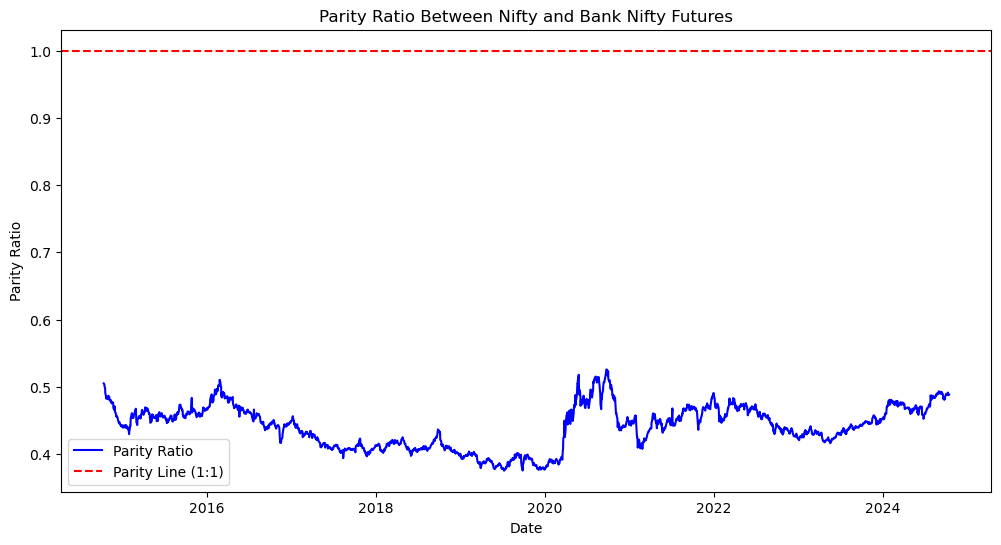

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Parity_Ratio'], label='Parity Ratio', color='blue')
plt.axhline(y=1, color='red', linestyle='--', label='Parity Line (1:1)')
plt.title('Parity Ratio Between Nifty and Bank Nifty Futures')
plt.xlabel('Date')
plt.ylabel('Parity Ratio')
plt.legend()
plt.show()


The parity ratio fluctuates between 0.4 and 0.6 over the years, indicating that Nifty futures are generally priced lower than Bank Nifty futures.
The lack of significant upward movements toward the 1.0 parity line suggests that the relationship between the two indices remains consistent, with Nifty not significantly catching up to Bank Nifty.

 The parity ratio appears to be relatively stable, suggesting that the historical pricing relationship between Nifty and Bank Nifty futures has not undergone drastic changes.

 If the parity ratio starts to deviate from the typical range (e.g., moves below 0.4 or above 0.55), it might signal an opportunity for pairs trading or reversion strategies, where one might consider long or short positions based on expected convergence back to the mean.


In [71]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(merged_data['Price_Nifty'], merged_data['Price_BankNifty'])
print(f'Cointegration test p-value: {p_value}')


Cointegration test p-value: 0.1073678821770162


In [1]:
# NEW COMBINED DATA

In [75]:
nifty_data=pd.read_excel("D:/Data/Downloads/New_Nifty.xlsx")
bnf_data=pd.read_excel("D:/Data/Downloads/New_Bnf.xlsx")

In [79]:
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
bnf_data['Date'] = pd.to_datetime(bnf_data['Date'])

# Step 3: Merge the DataFrames on the 'Date' column
merged_data = pd.merge(nifty_data, bnf, on='Date', suffixes=('_Nifty', '_BankNifty'))

# Step 4: Check the merged DataFrame
print(merged_data.head())

        Date  High_Nifty     Price      Open  High_BankNifty       Low   Vol.  \
0 2024-10-11    25150.00  51386.40  51897.00         51897.0  51219.10  1.62M   
1 2024-10-10    25269.05  51780.95  51510.00         51930.0  51431.00  1.43M   
2 2024-10-09    25357.00  51373.70  51460.00         52037.0  51311.30  3.15M   
3 2024-10-08    25200.00  51392.50  51132.05         51559.0  50878.05  1.95M   
4 2024-10-07    25299.00  51016.25  51999.00         52140.0  50696.20  3.87M   

   Change %  
0   -0.0076  
1    0.0079  
2   -0.0004  
3    0.0074  
4   -0.0165  


In [81]:
# Step 1: Convert the Date columns to datetime (as you already have)
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
bnf_data['Date'] = pd.to_datetime(bnf_data['Date'])

# Step 2: Merge the DataFrames on the 'Date' column
merged_data = pd.merge(nifty_data, bnf_data, on='Date', suffixes=('_Nifty', '_BankNifty'))

# Step 3: Save the merged DataFrame to an Excel file
merged_data.to_excel('merged_data.xlsx', index=False)

# Optional: Confirm that the file was saved
print("Data successfully saved to 'merged_data.xlsx'")


Data successfully saved to 'merged_data.xlsx'


In [91]:
# Step 3: Save the merged DataFrame to the Downloads folder (Windows)
file_path = r'C:\Users\Public\Downloads\merged_data.xlsx'
merged_data.to_excel(file_path, index=False)

# Confirm that the file was saved
print(f"Data successfully saved to {file_path}")


Data successfully saved to C:\Users\Public\Downloads\merged_data.xlsx
